In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
import pandas as pd
from sklearn import metrics

In [2]:
# 讀取資料
df=pd.read_csv('./dataset1.csv')
df.drop(df[df['Sample'] == "Train"].index, inplace = True)
#df.drop(df[df['Sample'] == "Test"].index, inplace = True)
df['Diagnosis'] = df['Diagnosis'].replace(['Controls+Borderline'], 0)
df['Diagnosis'] = df['Diagnosis'].replace(['Cancer'], 1)
df['Output'] = df['Output'].replace(['Controls+Borderline'], 0)
df['Output'] = df['Output'].replace(['Cancer'], 1)

In [5]:
# 在各種『決策門檻』（decision threshold）下，計算 『真陽率』（True Positive Rate；TPR）與『假陽率』（False Positive Rate；FPR）
fpr, tpr,threshold = roc_curve(df['Diagnosis'], df['Output'])
print(fpr, tpr, threshold)

[0.  0.1 1. ] [0.         0.88235294 1.        ] [2 1 0]


In [6]:
auc1 = auc(fpr, tpr)
print(auc1)

0.8911764705882352


In [7]:
P= df[df['Diagnosis']==1].shape[0]
N= df[df['Diagnosis']==0].shape[0]
print(P,N)
y_unit=1/P
X_unit=1/N

# 以第一欄降冪排序，從大排到小。
df=df.sort_values(by='Output', ascending=False)

# 依序掃描第二欄，計算每一座標點
# 若是1，Y加一單位，反之，若是0，X加一單位
X=[]
y=[]
current_X=0
current_y=0
for row in df.itertuples():
    # row[0] is index
    #print(row[2])
    if row[2] == 1:
        current_y+=y_unit
    else:
        current_X+=X_unit
    X.append(current_X)
    y.append(current_y)

X1=np.array(X)        
y1=np.array(y)    
print(X1, y1)
print(y_unit)

34 10
[0.  0.  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.2 0.3 0.4 0.5
 0.6 0.7 0.7 0.8 0.8 0.8 0.9 1. ] [0.02941176 0.05882353 0.05882353 0.08823529 0.11764706 0.14705882
 0.17647059 0.20588235 0.23529412 0.26470588 0.29411765 0.32352941
 0.35294118 0.38235294 0.41176471 0.44117647 0.47058824 0.5
 0.52941176 0.55882353 0.58823529 0.61764706 0.64705882 0.67647059
 0.70588235 0.73529412 0.76470588 0.79411765 0.82352941 0.85294118
 0.88235294 0.91176471 0.91176471 0.91176471 0.91176471 0.91176471
 0.91176471 0.91176471 0.94117647 0.94117647 0.97058824 1.
 1.         1.        ]
0.029411764705882353


In [9]:
# 讀取資料
df2=pd.read_csv('./dataset2_all.csv')
df2.drop(df2[df2['Sample'] == "Train"].index, inplace = True)
#df2.drop(df2[df2['Sample'] == "Test"].index, inplace = True)
df2['Diagnosis'] = df2['Diagnosis'].replace(['Controls+Borderline'], 0)
df2['Diagnosis'] = df2['Diagnosis'].replace(['Cancer'], 1)
df2['Output'] = df2['Output'].replace(['Controls+Borderline'], 0)
df2['Output'] = df2['Output'].replace(['Cancer'], 1)

In [10]:
# 在各種『決策門檻』（decision threshold）下，計算 『真陽率』（True Positive Rate；TPR）與『假陽率』（False Positive Rate；FPR）
fpr2, tpr2,threshold2 = roc_curve(df2['Diagnosis'], df2['Output'])
print(fpr2, tpr2, threshold2)

[0.  0.5 1. ] [0. 1. 1.] [2 1 0]


In [11]:
auc2 = auc(fpr2, tpr2)
print(auc2)

0.75


In [12]:
P2= df2[df2['Diagnosis']==1].shape[0]
N2= df2[df2['Diagnosis']==0].shape[0]
print(P2,N2)
y_unit=1/P2
X_unit=1/N2

# 以第一欄降冪排序，從大排到小。
df2=df2.sort_values(by='Output', ascending=False)

# 依序掃描第二欄，計算每一座標點
# 若是1，Y加一單位，反之，若是0，X加一單位
X2=[]
y2=[]
current_X2=0
current_y2=0
for row in df2.itertuples():
    # row[0] is index
    #print(row[2])
    if row[2] == 1:
        current_y2+=y_unit
    else:
        current_X2+=X_unit
    X2.append(current_X2)
    y2.append(current_y2)

X2=np.array(X2)        
y2=np.array(y2) 
print(X2, y2)

34 10
[0.1 0.1 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.3 0.3 0.4 0.4 0.4 0.4 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.6 0.7 0.8 0.9 1. ] [0.         0.02941176 0.02941176 0.05882353 0.08823529 0.11764706
 0.14705882 0.17647059 0.20588235 0.23529412 0.26470588 0.29411765
 0.32352941 0.35294118 0.38235294 0.41176471 0.44117647 0.47058824
 0.5        0.52941176 0.55882353 0.58823529 0.61764706 0.64705882
 0.67647059 0.67647059 0.70588235 0.70588235 0.73529412 0.76470588
 0.79411765 0.79411765 0.82352941 0.85294118 0.88235294 0.91176471
 0.94117647 0.97058824 1.         1.         1.         1.
 1.         1.        ]


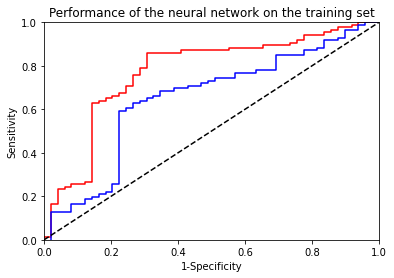

In [11]:
# 繪圖。   
plt.title('Performance of the neural network on the training set')
plt.plot(X1, y1, color = 'red', label = 'AUC = %0.2f' % auc1)
plt.plot(X2, y2, color = 'blue', label = 'AUC = %0.2f' % auc2)
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Sensitivity')
plt.xlabel('1-Specificity')
plt.show()   

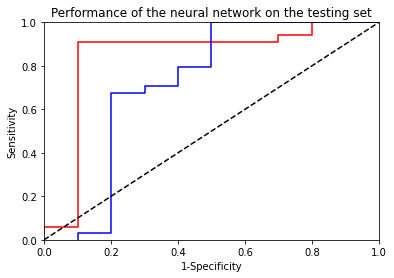

In [13]:
# 繪圖。   
plt.title('Performance of the neural network on the testing set')
plt.plot(X1, y1, color = 'red', label = 'AUC = %0.2f' % auc1)
plt.plot(X2, y2, color = 'blue', label = 'AUC = %0.2f' % auc2)
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Sensitivity')
plt.xlabel('1-Specificity')
plt.show()   

In [12]:
print(auc1, auc2)

0.756763170384433 0.5351210251542476
